# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
URL='https://www.commonfloor.com/hyderabad-property/for-sale'

In [3]:
page=requests.get(URL)

In [4]:
page.status_code

200

In [5]:
htmlcode=page.text

In [6]:
htmlcode

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n<meta name="viewport" content="height=device-height, width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=0" />\n<link rel="manifest" href="/manifest.json" />\n<!-- Chrome, Firefox OS and Opera -->\n<meta name="theme-color" content="#0e1023">\n<!-- Windows Phone -->\n<meta name="msapplication-navbutton-color" content="#0e1023">\n<!-- iOS Safari -->\n<meta name="apple-mobile-web-app-status-bar-style" content="#0e1023">\n<meta charset="UTF-8"><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.eu01.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-975c7885532d44c79eb",applicationID:"102821505"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require

In [7]:
soup=BeautifulSoup(htmlcode)
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="height=device-height, width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=0" name="viewport"/>
  <link href="/manifest.json" rel="manifest"/>
  <!-- Chrome, Firefox OS and Opera -->
  <meta content="#0e1023" name="theme-color"/>
  <!-- Windows Phone -->
  <meta content="#0e1023" name="msapplication-navbutton-color"/>
  <!-- iOS Safari -->
  <meta content="#0e1023" name="apple-mobile-web-app-status-bar-style"/>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.eu01.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-975c7885532d44c79eb",applicationID:"102821505"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)retur

In [8]:

for i in range(1, 10):
    print('https://www.commonfloor.com/hyderabad-property/for-sale?page={}'. format(i))

https://www.commonfloor.com/hyderabad-property/for-sale?page=1
https://www.commonfloor.com/hyderabad-property/for-sale?page=2
https://www.commonfloor.com/hyderabad-property/for-sale?page=3
https://www.commonfloor.com/hyderabad-property/for-sale?page=4
https://www.commonfloor.com/hyderabad-property/for-sale?page=5
https://www.commonfloor.com/hyderabad-property/for-sale?page=6
https://www.commonfloor.com/hyderabad-property/for-sale?page=7
https://www.commonfloor.com/hyderabad-property/for-sale?page=8
https://www.commonfloor.com/hyderabad-property/for-sale?page=9


# Extractiing from website 

In [211]:
%%time
price = []
agents =[]
features_1 = []

post_time=[]


title=[]


for i in range(1, 31):
    URL = 'https://www.commonfloor.com/hyderabad-property/for-sale?page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : 'snb-tile new-booking impressionAd'}):
        
        
        
        post_date = x.find('div', attrs = {'class' : 'posteddate'})
        if post_date is None:
            post_time.append(np.NaN)
        else:
            post_time.append(post_date.text)
###################################################################################
       
        prices = x.find('span', attrs = {'class' : 's_p'})
        if prices is None:
            price.append(np.NaN)
        else:
            price.append(prices.text)
##################################################################################            
            
        title_name = x.find('div', attrs = {'class' : 'st_title'})
        if title_name is None:
            title.append(np.NaN)
        else:
            title.append(title_name.text)
            
################################################################################            
            
            
        agent = x.find('div', attrs = {'class' : 'infownertext'})
        if agent is None:
            agents.append(np.NaN)
        else:
            agents.append(agent.text)
##############################################################################            
            

        features= x.find('a', attrs = {'class' : 'snblink clearfix'})
        if features is None:
            features_1.append(np.NaN)
        else:
            features_1.append(features.text)

       

# Data Frame

In [212]:
df = pd.DataFrame({'title': title,'prices' : price,'features' : features_1 ,"booking_start":post_time,'organizing' : agents})

In [213]:
df.head()

In [12]:
df.shape

(532, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          532 non-null    object
 1   prices         532 non-null    object
 2   features       532 non-null    object
 3   booking_start  532 non-null    object
 4   organizing     532 non-null    object
dtypes: object(5)
memory usage: 20.9+ KB


In [206]:
#df.to_csv("commonfloor.csv", index=False)

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv("commonfloor.csv")
df.head(8)

,title,prices,features,booking_start,organizing
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n
5,\n2BHK Villa for Sale in Indresham\nIndresham\...,\n 52 L,\n\n\nCarpet Area\n\n 800 sq.ft (...,Posted : Today,\nAgent : \nShiv Shankar\n
6,\n2BHK Villa for Sale in Indresham\nIndresham\...,\n 52 L,\n\n\nCarpet Area\n\n 800 sq.ft (...,Posted : Today,\nAgent : \nShiv Shankar\n
7,\n4BHK Apartment for Sale in Nanakramguda\nNan...,\n 1.70 Cr,\n\n\nCarpet Area\n\n 1816 sq.ft ...,Posted : Today,\nAgent : \nRnaveen\n


In [3]:
df.shape

(532, 5)

# Using regex to modifying the columns

In [4]:
regex = "@\s(\d*)"
df['cost_per_sqft'] = df['features'].apply(lambda x : re.findall(regex, x))

In [5]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n,[7622]
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n,[13692]
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n,[5875]
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n,[5753]
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n,[2500]


In [6]:
regex=r'(\d*)\ssq.ft'

df['plot_area'] = df['features'].apply(lambda x : re.findall(regex, x))

In [7]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n,[7622],[1850]
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n,[13692],[2224]
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n,[5875],[1260]
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n,[5753],[914]
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n,[2500],[1200]


In [8]:
df.plot_area = df.plot_area.apply(lambda x : ''.join(x))
df.cost_per_sqft = df.cost_per_sqft.apply(lambda x : ''.join(x))

In [9]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n,7622,1850
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n,5875,1260
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n,5753,914
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n,2500,1200


# Replace 0 with space values in numerical columns

In [10]:
df["plot_area"].replace(to_replace="",value="0",inplace=True)
df.plot_area=df.plot_area.astype(int)

In [11]:
regex=r'\d+\s*BHK\s[A-Za-z]+'
df['type_of_house'] = df['title'].apply(lambda x : re.findall(regex, x))

In [12]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area,type_of_house
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n,7622,1850,[3BHK Apartment]
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,[4BHK Apartment]
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n,5875,1260,[3 BHK Apartment]
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n,5753,914,[2 BHK Apartment]
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n,2500,1200,[2BHK Apartment]


In [13]:
regex=r'in\s[A-Za-z]+'
df['place'] = df['title'].apply(lambda x : re.findall(regex, x))

In [14]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n,7622,1850,[3BHK Apartment],[in Kondapur]
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,[4BHK Apartment],[in Shaikpet]
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n,5875,1260,[3 BHK Apartment],[in Jeedimetla]
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n,5753,914,[2 BHK Apartment],[in Pocharam]
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n,2500,1200,[2BHK Apartment],[in Patancheru]


In [15]:
df.place = df.place.apply(lambda x : ''.join(x))

In [16]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n,7622,1850,[3BHK Apartment],in Kondapur
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,[4BHK Apartment],in Shaikpet
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n,5875,1260,[3 BHK Apartment],in Jeedimetla
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n,5753,914,[2 BHK Apartment],in Pocharam
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n,2500,1200,[2BHK Apartment],in Patancheru


In [17]:
regex=r'\s[A-Za-z]+'
df['place'] = df['place'].apply(lambda x : re.findall(regex, x))

In [18]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,Posted : 25 days ago,\nAgent : \nRamana\n,7622,1850,[3BHK Apartment],[ Kondapur]
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,Posted : 20 days ago,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,[4BHK Apartment],[ Shaikpet]
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,Posted : 26 days ago,\nAgent : \nHyderabad Marketing Team\n,5875,1260,[3 BHK Apartment],[ Jeedimetla]
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,Posted : 18 days ago,\nAgent : \nHyderabad Marketing Team\n,5753,914,[2 BHK Apartment],[ Pocharam]
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,Posted : Today,\nAgent : \nMarisetti Saidaiah\n,2500,1200,[2BHK Apartment],[ Patancheru]


In [19]:
regex=r'\d+'
df['booking_start'] = df['booking_start'].apply(lambda x : re.findall(regex, x))

In [20]:
df.type_of_house = df.type_of_house.apply(lambda x : ''.join(x))
df.place = df.place.apply(lambda x : ''.join(x))
df.place = df.place.apply(lambda x : ''.join(x))

In [21]:
regex=r'\d'
df['type_BHK'] = df['type_of_house'].apply(lambda x : re.findall(regex, x))

In [22]:
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,[25],\nAgent : \nRamana\n,7622,1850,3BHK Apartment,Kondapur,[3]
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,[20],\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,4BHK Apartment,Shaikpet,[4]
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,[26],\nAgent : \nHyderabad Marketing Team\n,5875,1260,3 BHK Apartment,Jeedimetla,[3]
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,[18],\nAgent : \nHyderabad Marketing Team\n,5753,914,2 BHK Apartment,Pocharam,[2]
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,[],\nAgent : \nMarisetti Saidaiah\n,2500,1200,2BHK Apartment,Patancheru,[2]


In [23]:
df.type_BHK = df.type_BHK.apply(lambda x : ''.join(x))
df.head()

,title,prices,features,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,\n\n\nCarpet Area\n\n 1850 sq.ft ...,[25],\nAgent : \nRamana\n,7622,1850,3BHK Apartment,Kondapur,3
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,\n\n\nCarpet Area\n\n 2224 sq.ft ...,[20],\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,4BHK Apartment,Shaikpet,4
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,\n\n\nCarpet Area\n\n 1260 sq.ft ...,[26],\nAgent : \nHyderabad Marketing Team\n,5875,1260,3 BHK Apartment,Jeedimetla,3
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,\n\n\nCarpet Area\n\n 914 sq.ft (...,[18],\nAgent : \nHyderabad Marketing Team\n,5753,914,2 BHK Apartment,Pocharam,2
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,\n\n\nCarpet Area\n\n 1200 sq.ft ...,[],\nAgent : \nMarisetti Saidaiah\n,2500,1200,2BHK Apartment,Patancheru,2


# Removing unwanted columns

In [24]:
df.drop('features',axis = 1 , inplace = True)
df.head()

,title,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n3BHK Apartment for Sale in Kondapur\nIncor V...,\n 1.41 Cr,[25],\nAgent : \nRamana\n,7622,1850,3BHK Apartment,Kondapur,3
1,\n4BHK Apartment for Sale in Shaikpet\nSalarpu...,\n 3.04 Cr,[20],\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,4BHK Apartment,Shaikpet,4
2,\n 3 BHK Apartment for Sale in Jeedimetla\nEss...,\n 74.02 L,[26],\nAgent : \nHyderabad Marketing Team\n,5875,1260,3 BHK Apartment,Jeedimetla,3
3,\nNot Furnished 2 BHK Apartment for Sale in Po...,\n 52.57 L,[18],\nAgent : \nHyderabad Marketing Team\n,5753,914,2 BHK Apartment,Pocharam,2
4,\nSemi Furnished 2BHK Apartment for Sale in Pa...,\n 30 L,[],\nAgent : \nMarisetti Saidaiah\n,2500,1200,2BHK Apartment,Patancheru,2


In [25]:
df.drop('title',axis = 1 , inplace = True)


In [26]:
df.head(12)

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n 1.41 Cr,[25],\nAgent : \nRamana\n,7622,1850,3BHK Apartment,Kondapur,3
1,\n 3.04 Cr,[20],\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,4BHK Apartment,Shaikpet,4
2,\n 74.02 L,[26],\nAgent : \nHyderabad Marketing Team\n,5875,1260,3 BHK Apartment,Jeedimetla,3
3,\n 52.57 L,[18],\nAgent : \nHyderabad Marketing Team\n,5753,914,2 BHK Apartment,Pocharam,2
4,\n 30 L,[],\nAgent : \nMarisetti Saidaiah\n,2500,1200,2BHK Apartment,Patancheru,2
5,\n 52 L,[],\nAgent : \nShiv Shankar\n,6500,800,2BHK Villa,Indresham,2
6,\n 52 L,[],\nAgent : \nShiv Shankar\n,6500,800,2BHK Villa,Indresham,2
7,\n 1.70 Cr,[],\nAgent : \nRnaveen\n,9374,1816,4BHK Apartment,Nanakramguda,4
8,\n 2.24 Cr,[],\nAgent : \nRnaveen\n,9374,2400,4BHK Apartment,Nanakramguda,4
9,\n 1.16 Cr,[],\nAgent : \nMarisetti Saidaiah\n,4500,2580,4BHK Villa,Beeramguda,4


In [27]:
df.booking_start=df.booking_start.apply(lambda x: ''.join(x))

In [28]:
df["booking_start"].value_counts().sum()

532

In [29]:
df.head(10)

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n 1.41 Cr,25,\nAgent : \nRamana\n,7622,1850,3BHK Apartment,Kondapur,3
1,\n 3.04 Cr,20,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,4BHK Apartment,Shaikpet,4
2,\n 74.02 L,26,\nAgent : \nHyderabad Marketing Team\n,5875,1260,3 BHK Apartment,Jeedimetla,3
3,\n 52.57 L,18,\nAgent : \nHyderabad Marketing Team\n,5753,914,2 BHK Apartment,Pocharam,2
4,\n 30 L,,\nAgent : \nMarisetti Saidaiah\n,2500,1200,2BHK Apartment,Patancheru,2
5,\n 52 L,,\nAgent : \nShiv Shankar\n,6500,800,2BHK Villa,Indresham,2
6,\n 52 L,,\nAgent : \nShiv Shankar\n,6500,800,2BHK Villa,Indresham,2
7,\n 1.70 Cr,,\nAgent : \nRnaveen\n,9374,1816,4BHK Apartment,Nanakramguda,4
8,\n 2.24 Cr,,\nAgent : \nRnaveen\n,9374,2400,4BHK Apartment,Nanakramguda,4
9,\n 1.16 Cr,,\nAgent : \nMarisetti Saidaiah\n,4500,2580,4BHK Villa,Beeramguda,4


# Total scraped data


In [30]:
df

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n 1.41 Cr,25,\nAgent : \nRamana\n,7622,1850,3BHK Apartment,Kondapur,3
1,\n 3.04 Cr,20,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,4BHK Apartment,Shaikpet,4
2,\n 74.02 L,26,\nAgent : \nHyderabad Marketing Team\n,5875,1260,3 BHK Apartment,Jeedimetla,3
3,\n 52.57 L,18,\nAgent : \nHyderabad Marketing Team\n,5753,914,2 BHK Apartment,Pocharam,2
4,\n 30 L,,\nAgent : \nMarisetti Saidaiah\n,2500,1200,2BHK Apartment,Patancheru,2
...,...,...,...,...,...,...,...,...
527,\n 89 L,10,\nAgent : \nHyderabad Marketing Team\n,9214,966,2 BHK Apartment,Gandipet,2
528,\n 1.84 Cr,10,\nAgent : \nHyderabad Marketing Team\n,10421,1767,1 BHK Villa,Srisailam,1
529,\n 1.40 Cr,23,\nAgent : \nVikas Triwedi Esolis\n,10903,1284,3BHK Apartment,Nallagandla,3
530,\n 70.45 L,4,\nAgent : \nHyderabad Marketing Team\n,6874,1025,2 BHK Apartment,Tellapur,2


In [31]:
df.shape

(532, 8)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prices         532 non-null    object
 1   booking_start  532 non-null    object
 2   organizing     532 non-null    object
 3   cost_per_sqft  532 non-null    object
 4   plot_area      532 non-null    int32 
 5   type_of_house  532 non-null    object
 6   place          532 non-null    object
 7   type_BHK       532 non-null    object
dtypes: int32(1), object(7)
memory usage: 31.3+ KB


In [33]:
df.isnull().sum()

prices           0
booking_start    0
organizing       0
cost_per_sqft    0
plot_area        0
type_of_house    0
place            0
type_BHK         0
dtype: int64

# Checking null values

In [34]:
df[df.type_of_house=='']

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
62,\n 1.40 Cr,1,\nAgent : \nManikanta properties\n,5000,2800,,Hayat,
177,\n 17.34 Cr,4,\nAgent : \nHyderabad Marketing Team\n,17501,9908,,Jubilee,
202,\n 1.06 Cr,4,\nAgent : \nHyderabad Marketing Team\n,6019,1761,,Attapur,
210,\n 9.84 Cr,4,\nAgent : \nHyderabad Marketing Team\n,17496,5624,,Jubilee,
289,\n 1.06 Cr,4,\nAgent : \nHyderabad Marketing Team\n,6019,1761,,Attapur,
338,\n 1.06 Cr,4,\nAgent : \nHyderabad Marketing Team\n,6019,1761,,Attapur,


In [35]:
df["type_BHK"].replace(to_replace="",value="3",inplace=True)
df.type_BHK=df.type_BHK.astype(int)
df.head()

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n 1.41 Cr,25,\nAgent : \nRamana\n,7622,1850,3BHK Apartment,Kondapur,3
1,\n 3.04 Cr,20,\nBuilder : \nSalarpuria Sattva Group\n,13692,2224,4BHK Apartment,Shaikpet,4
2,\n 74.02 L,26,\nAgent : \nHyderabad Marketing Team\n,5875,1260,3 BHK Apartment,Jeedimetla,3
3,\n 52.57 L,18,\nAgent : \nHyderabad Marketing Team\n,5753,914,2 BHK Apartment,Pocharam,2
4,\n 30 L,,\nAgent : \nMarisetti Saidaiah\n,2500,1200,2BHK Apartment,Patancheru,2


In [36]:
df[df.type_BHK=='']

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK


In [37]:
df["cost_per_sqft"].replace(to_replace="",value="0",inplace=True)
df.cost_per_sqft=df.cost_per_sqft.astype(float)
df.head()

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,\n 1.41 Cr,25,\nAgent : \nRamana\n,7622.0,1850,3BHK Apartment,Kondapur,3
1,\n 3.04 Cr,20,\nBuilder : \nSalarpuria Sattva Group\n,13692.0,2224,4BHK Apartment,Shaikpet,4
2,\n 74.02 L,26,\nAgent : \nHyderabad Marketing Team\n,5875.0,1260,3 BHK Apartment,Jeedimetla,3
3,\n 52.57 L,18,\nAgent : \nHyderabad Marketing Team\n,5753.0,914,2 BHK Apartment,Pocharam,2
4,\n 30 L,,\nAgent : \nMarisetti Saidaiah\n,2500.0,1200,2BHK Apartment,Patancheru,2


In [38]:
df[df.type_BHK=='']

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         532 non-null    object 
 1   booking_start  532 non-null    object 
 2   organizing     532 non-null    object 
 3   cost_per_sqft  532 non-null    float64
 4   plot_area      532 non-null    int32  
 5   type_of_house  532 non-null    object 
 6   place          532 non-null    object 
 7   type_BHK       532 non-null    int32  
dtypes: float64(1), int32(2), object(5)
memory usage: 29.2+ KB


In [40]:
df.prices = df.prices.apply(lambda x : x.replace('\n', '') if '' in x else x)

In [41]:
df.drop(df[df['prices'] == '          Call For Price        '].index,inplace = True)

In [42]:
df['prices'] = df['prices'].apply(lambda x : float(x.replace('L',''))*100000 if 'L' in x else 
                                  float(x.replace('Cr',''))*10000000 if 'Cr' in x else float(x))
df['prices'] = df['prices'].astype(float)

In [43]:
df['prices']

0      14100000.0
1      30400000.0
2       7402000.0
3       5257000.0
4       3000000.0
          ...    
527     8900000.0
528    18400000.0
529    14000000.0
530     7045000.0
531    12300000.0
Name: prices, Length: 531, dtype: float64

In [44]:
df.organizing = df.organizing.apply(lambda x : x.replace('\n', '') if '' in x else x)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 531
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         531 non-null    float64
 1   booking_start  531 non-null    object 
 2   organizing     531 non-null    object 
 3   cost_per_sqft  531 non-null    float64
 4   plot_area      531 non-null    int32  
 5   type_of_house  531 non-null    object 
 6   place          531 non-null    object 
 7   type_BHK       531 non-null    int32  
dtypes: float64(2), int32(2), object(4)
memory usage: 33.2+ KB


In [46]:
df.head()

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,14100000.0,25,Agent : Ramana,7622.0,1850,3BHK Apartment,Kondapur,3
1,30400000.0,20,Builder : Salarpuria Sattva Group,13692.0,2224,4BHK Apartment,Shaikpet,4
2,7402000.0,26,Agent : Hyderabad Marketing Team,5875.0,1260,3 BHK Apartment,Jeedimetla,3
3,5257000.0,18,Agent : Hyderabad Marketing Team,5753.0,914,2 BHK Apartment,Pocharam,2
4,3000000.0,,Agent : Marisetti Saidaiah,2500.0,1200,2BHK Apartment,Patancheru,2


In [47]:
df["booking_start"].replace(to_replace="",value="0",inplace=True)
df.booking_start=df.booking_start.astype(int)
df.head(10)

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,14100000.0,25,Agent : Ramana,7622.0,1850,3BHK Apartment,Kondapur,3
1,30400000.0,20,Builder : Salarpuria Sattva Group,13692.0,2224,4BHK Apartment,Shaikpet,4
2,7402000.0,26,Agent : Hyderabad Marketing Team,5875.0,1260,3 BHK Apartment,Jeedimetla,3
3,5257000.0,18,Agent : Hyderabad Marketing Team,5753.0,914,2 BHK Apartment,Pocharam,2
4,3000000.0,0,Agent : Marisetti Saidaiah,2500.0,1200,2BHK Apartment,Patancheru,2
5,5200000.0,0,Agent : Shiv Shankar,6500.0,800,2BHK Villa,Indresham,2
6,5200000.0,0,Agent : Shiv Shankar,6500.0,800,2BHK Villa,Indresham,2
7,17000000.0,0,Agent : Rnaveen,9374.0,1816,4BHK Apartment,Nanakramguda,4
8,22400000.0,0,Agent : Rnaveen,9374.0,2400,4BHK Apartment,Nanakramguda,4
9,11600000.0,0,Agent : Marisetti Saidaiah,4500.0,2580,4BHK Villa,Beeramguda,4


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 531
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prices         531 non-null    float64
 1   booking_start  531 non-null    int32  
 2   organizing     531 non-null    object 
 3   cost_per_sqft  531 non-null    float64
 4   plot_area      531 non-null    int32  
 5   type_of_house  531 non-null    object 
 6   place          531 non-null    object 
 7   type_BHK       531 non-null    int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 31.1+ KB


In [49]:
df["type_of_house"]=df["type_of_house"].apply(lambda x: x.replace(' ',''))

In [50]:
df

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,14100000.0,25,Agent : Ramana,7622.0,1850,3BHKApartment,Kondapur,3
1,30400000.0,20,Builder : Salarpuria Sattva Group,13692.0,2224,4BHKApartment,Shaikpet,4
2,7402000.0,26,Agent : Hyderabad Marketing Team,5875.0,1260,3BHKApartment,Jeedimetla,3
3,5257000.0,18,Agent : Hyderabad Marketing Team,5753.0,914,2BHKApartment,Pocharam,2
4,3000000.0,0,Agent : Marisetti Saidaiah,2500.0,1200,2BHKApartment,Patancheru,2
...,...,...,...,...,...,...,...,...
527,8900000.0,10,Agent : Hyderabad Marketing Team,9214.0,966,2BHKApartment,Gandipet,2
528,18400000.0,10,Agent : Hyderabad Marketing Team,10421.0,1767,1BHKVilla,Srisailam,1
529,14000000.0,23,Agent : Vikas Triwedi Esolis,10903.0,1284,3BHKApartment,Nallagandla,3
530,7045000.0,4,Agent : Hyderabad Marketing Team,6874.0,1025,2BHKApartment,Tellapur,2


# droping unwanted rows

In [51]:
df.drop(df[df["type_of_house"]==""].index,inplace=True)

In [52]:
df.head()

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,14100000.0,25,Agent : Ramana,7622.0,1850,3BHKApartment,Kondapur,3
1,30400000.0,20,Builder : Salarpuria Sattva Group,13692.0,2224,4BHKApartment,Shaikpet,4
2,7402000.0,26,Agent : Hyderabad Marketing Team,5875.0,1260,3BHKApartment,Jeedimetla,3
3,5257000.0,18,Agent : Hyderabad Marketing Team,5753.0,914,2BHKApartment,Pocharam,2
4,3000000.0,0,Agent : Marisetti Saidaiah,2500.0,1200,2BHKApartment,Patancheru,2


# visualization

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
df

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,14100000.0,25,Agent : Ramana,7622.0,1850,3BHKApartment,Kondapur,3
1,30400000.0,20,Builder : Salarpuria Sattva Group,13692.0,2224,4BHKApartment,Shaikpet,4
2,7402000.0,26,Agent : Hyderabad Marketing Team,5875.0,1260,3BHKApartment,Jeedimetla,3
3,5257000.0,18,Agent : Hyderabad Marketing Team,5753.0,914,2BHKApartment,Pocharam,2
4,3000000.0,0,Agent : Marisetti Saidaiah,2500.0,1200,2BHKApartment,Patancheru,2
...,...,...,...,...,...,...,...,...
527,8900000.0,10,Agent : Hyderabad Marketing Team,9214.0,966,2BHKApartment,Gandipet,2
528,18400000.0,10,Agent : Hyderabad Marketing Team,10421.0,1767,1BHKVilla,Srisailam,1
529,14000000.0,23,Agent : Vikas Triwedi Esolis,10903.0,1284,3BHKApartment,Nallagandla,3
530,7045000.0,4,Agent : Hyderabad Marketing Team,6874.0,1025,2BHKApartment,Tellapur,2


In [56]:
df["type_BHK"].value_counts()

3    236
2    213
4     64
1     10
5      2
Name: type_BHK, dtype: int64

# Defining rooms using histogram

<AxesSubplot:xlabel='type_BHK', ylabel='Density'>

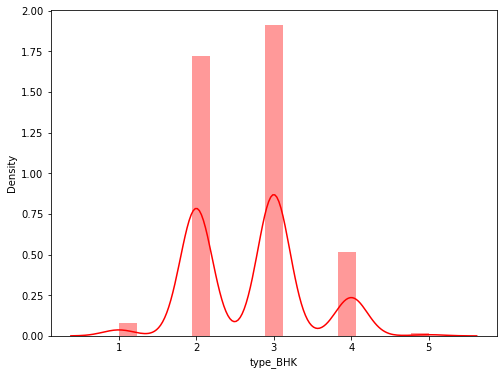

In [57]:
fig = plt.subplots(figsize=(8,6))
sns.distplot(df['type_BHK'], hist=True, rug=False,color="r")

# Booking using kde plot

<AxesSubplot:xlabel='booking_start', ylabel='Density'>

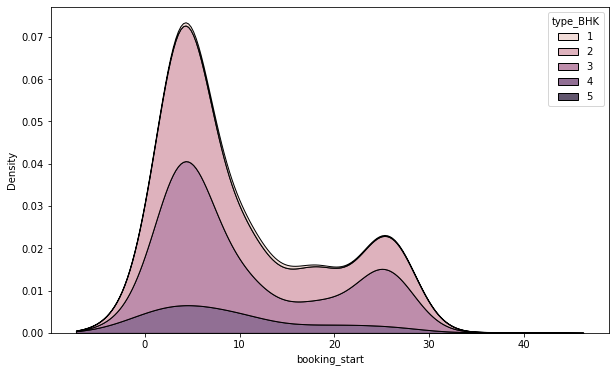

In [60]:
fig = plt.subplots(figsize=(10,6))
sns.kdeplot(data=df, x="booking_start", hue="type_BHK", multiple="stack")

# Defining outliers

<AxesSubplot:xlabel='type_of_house', ylabel='plot_area'>

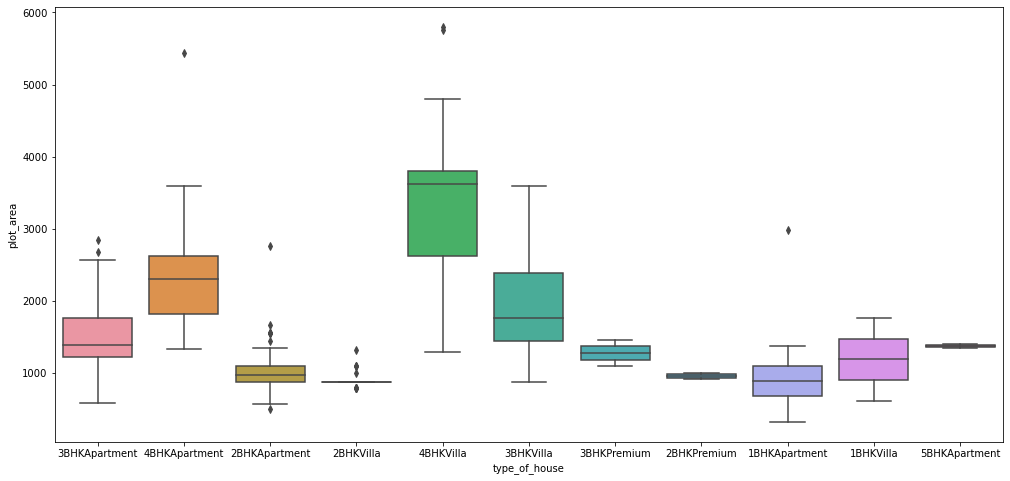

In [59]:
fig = plt.subplots(figsize=(17,8))
sns.boxplot(x='type_of_house', y='plot_area', data=df)


# plot area by barplot

<AxesSubplot:xlabel='type_BHK', ylabel='plot_area'>

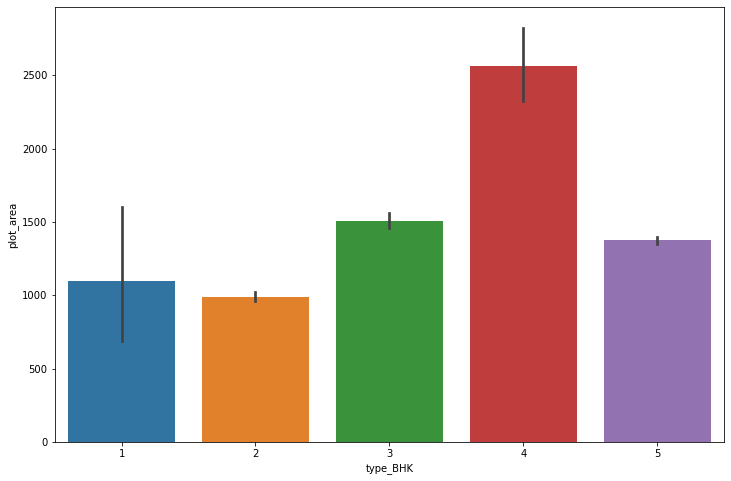

In [61]:

fig = plt.subplots(figsize=(12,8))
sns.barplot(x = "type_BHK", y = "plot_area",  data=df)

Text(0.5, 1.0, 'Distribution of BHK in the total city')

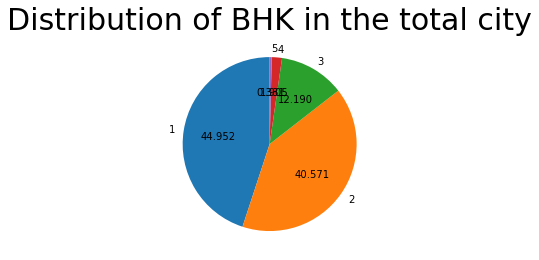

In [63]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10)
#explode = [0,0,0,0,0]
plt.pie(df["type_BHK"].value_counts(),startangle=90,autopct="%.3f",
        labels=["1","2","3","4","5"])
plt.title('Distribution of BHK in the total city', fontsize = 30)

# visualization using plotly 

In [62]:
! pip install plotly

In [63]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [64]:
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
from plotly import tools
init_notebook_mode(connected=True)

In [65]:
df

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,14100000.0,25,Agent : Ramana,7622.0,1850,3BHKApartment,Kondapur,3
1,30400000.0,20,Builder : Salarpuria Sattva Group,13692.0,2224,4BHKApartment,Shaikpet,4
2,7402000.0,26,Agent : Hyderabad Marketing Team,5875.0,1260,3BHKApartment,Jeedimetla,3
3,5257000.0,18,Agent : Hyderabad Marketing Team,5753.0,914,2BHKApartment,Pocharam,2
4,3000000.0,0,Agent : Marisetti Saidaiah,2500.0,1200,2BHKApartment,Patancheru,2
...,...,...,...,...,...,...,...,...
527,8900000.0,10,Agent : Hyderabad Marketing Team,9214.0,966,2BHKApartment,Gandipet,2
528,18400000.0,10,Agent : Hyderabad Marketing Team,10421.0,1767,1BHKVilla,Srisailam,1
529,14000000.0,23,Agent : Vikas Triwedi Esolis,10903.0,1284,3BHKApartment,Nallagandla,3
530,7045000.0,4,Agent : Hyderabad Marketing Team,6874.0,1025,2BHKApartment,Tellapur,2


## Price of houses

In [67]:







# df.prices.iplot(
#     kind='hist',
#     bins=100,
#     xTitle='prices in all the rows',
#     color = 'green',
#     linecolor='black',
#     yTitle='count',
#     title='price of houses ')

# Available areas using bar plot

In [100]:
 #px.bar(df,x="place",y="plot_area")


# Scatter plot 

In [80]:
import plotly.express as px
px.scatter(df,x="place",y="plot_area",size_max=20)

In [ ]:
# df.booking_start.iplot(
#     kind='hist',
#     bins=100,
#     xTitle='booking start days ago',
#     color = 'black',
#     linecolor='white',
#     yTitle='count',
#     title='booking')

In [73]:
import plotly Express as px
fig = px.scatter(df, x="plot_area", y="place", color="no_of_rooms")
fig.show()

SyntaxError: invalid syntax (<ipython-input-73-bd0f54a2e0d6>, line 1)

#  A person wants  a Villa 

## Here we will give information about villas with their  priorities


In [81]:
df_pie=df[(df["plot_area"]>=3000)&(df["plot_area"]<=5000)]
df_pie.head()

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
24,34100000.0,0,Agent : Rnaveen,10396.0,3280,4BHKApartment,Himayath,4
51,39200000.0,3,Agent : square,10889.0,3600,3BHKVilla,Mokila,3
54,13600000.0,18,Agent : Rajineesh,4300.0,3180,4BHKVilla,Beeramguda,4
74,45000000.0,18,Agent : Marketing Team,12500.0,3600,4BHKApartment,Banjara,4
108,15600000.0,18,Agent : Rajineesh,4300.0,3630,4BHKVilla,Beeramguda,4


Text(0.5, 1.0, 'Distribution of 4BHK-Villa,3BHK-Villa and 4BHK-Apartment')

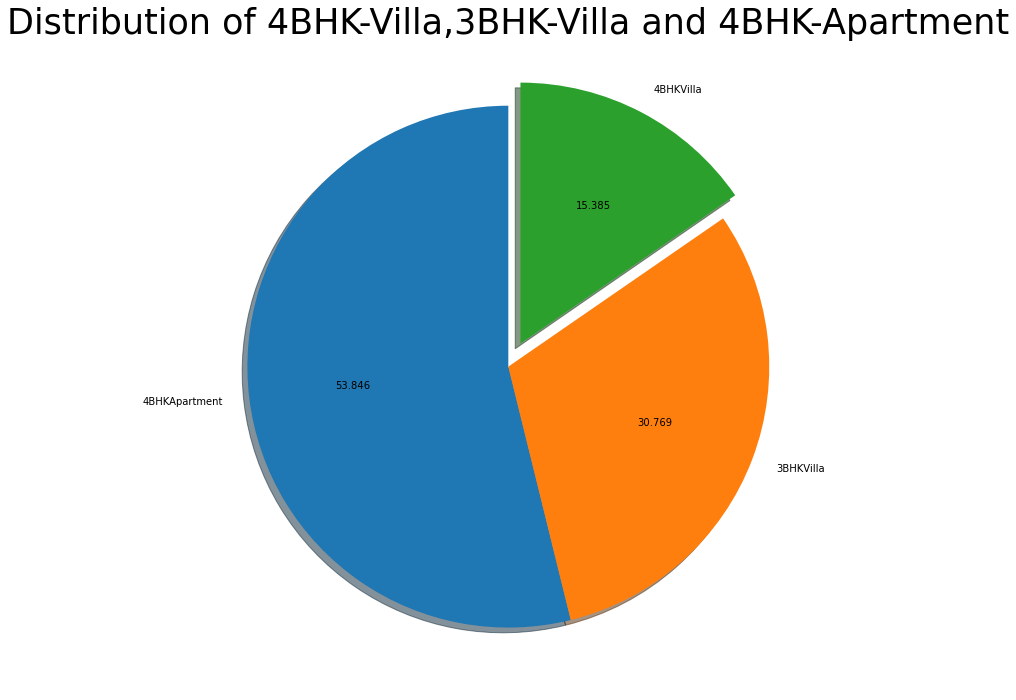

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
explode = [0,  0, 0.1]
plt.pie(df_pie["type_of_house"].value_counts(),startangle=90,autopct="%.3f",
        labels=["4BHKApartment","3BHKVilla","4BHKVilla"],shadow=True,explode=explode)
plt.title('Distribution of 4BHK-Villa,3BHK-Villa and 4BHK-Apartment', fontsize = 35)

In [83]:
df_v=df[(df["type_of_house"]=="4BHKVilla")]

In [84]:
df_v

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
9,11600000.0,0,Agent : Marisetti Saidaiah,4500.0,2580,4BHKVilla,Beeramguda,4
54,13600000.0,18,Agent : Rajineesh,4300.0,3180,4BHKVilla,Beeramguda,4
108,15600000.0,18,Agent : Rajineesh,4300.0,3630,4BHKVilla,Beeramguda,4
113,40000000.0,10,Agent : Rnaveen,8333.0,4800,4BHKVilla,Begumpet,4
227,63000000.0,4,Agent : Hyderabad Marketing Team,17365.0,3628,4BHKVilla,Tellapur,4
325,9033000.0,26,Agent : Hyderabad Marketing Team,7013.0,1288,4BHKVilla,Rampally,4
383,40400000.0,4,Agent : Hyderabad Marketing Team,10625.0,3808,4BHKVilla,Shamshabad,4
391,63000000.0,4,Agent : Hyderabad Marketing Team,17365.0,3628,4BHKVilla,Tellapur,4
399,7500000.0,39,Builder : CHANDRAKANTH REDDY,5000.0,1500,4BHKVilla,Maheshwaram,4
402,11600000.0,0,Agent : Marisetti Saidaiah,4500.0,2580,4BHKVilla,Beeramguda,4


<AxesSubplot:xlabel='plot_area', ylabel='Density'>

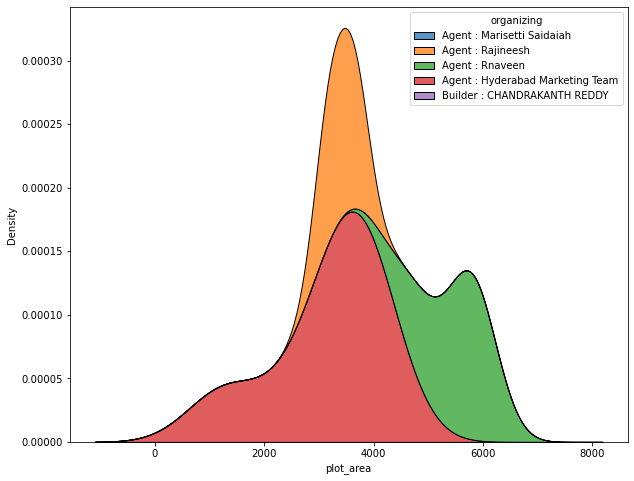

In [85]:
fig = plt.subplots(figsize=(10,8))
sns.kdeplot(data=df_v, x="plot_area", hue="organizing", multiple="stack")

<AxesSubplot:xlabel='place', ylabel='plot_area'>

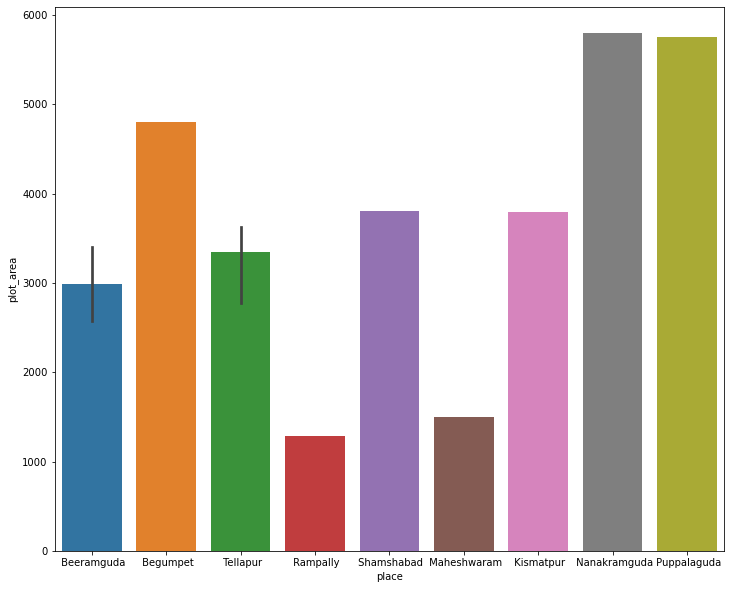

In [86]:

fig = plt.subplots(figsize=(12,10))
sns.barplot(x = "place", y = "plot_area",  data=df_v)

In [87]:
df_v1=df_v[(df_v["plot_area"]>=2000)&(df_v["plot_area"]<=5000)]
df_v1

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
9,11600000.0,0,Agent : Marisetti Saidaiah,4500.0,2580,4BHKVilla,Beeramguda,4
54,13600000.0,18,Agent : Rajineesh,4300.0,3180,4BHKVilla,Beeramguda,4
108,15600000.0,18,Agent : Rajineesh,4300.0,3630,4BHKVilla,Beeramguda,4
113,40000000.0,10,Agent : Rnaveen,8333.0,4800,4BHKVilla,Begumpet,4
227,63000000.0,4,Agent : Hyderabad Marketing Team,17365.0,3628,4BHKVilla,Tellapur,4
383,40400000.0,4,Agent : Hyderabad Marketing Team,10625.0,3808,4BHKVilla,Shamshabad,4
391,63000000.0,4,Agent : Hyderabad Marketing Team,17365.0,3628,4BHKVilla,Tellapur,4
402,11600000.0,0,Agent : Marisetti Saidaiah,4500.0,2580,4BHKVilla,Beeramguda,4
443,40000000.0,5,Agent : Hyderabad Marketing Team,14409.0,2776,4BHKVilla,Tellapur,4
459,63000000.0,18,Agent : Hyderabad Marketing Team,16579.0,3800,4BHKVilla,Kismatpur,4


In [88]:
df_v2=df_v1[(df_v1["prices"]>=20000000)&(df_v1["prices"]<=40000000)]

In [89]:
df_v2

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
113,40000000.0,10,Agent : Rnaveen,8333.0,4800,4BHKVilla,Begumpet,4
443,40000000.0,5,Agent : Hyderabad Marketing Team,14409.0,2776,4BHKVilla,Tellapur,4


# A person wants  a Apartment

## Here we will give information about Apartments with their priorities

In [90]:
df_A=df[(df["type_of_house"]=="3BHKApartment")]
df_A

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
0,14100000.0,25,Agent : Ramana,7622.0,1850,3BHKApartment,Kondapur,3
2,7402000.0,26,Agent : Hyderabad Marketing Team,5875.0,1260,3BHKApartment,Jeedimetla,3
11,8403000.0,0,Agent : Marisetti Saidaiah,4949.0,1698,3BHKApartment,Pragathi,3
14,4500000.0,0,Agent : Marisetti Saidaiah,3000.0,1500,3BHKApartment,Patancheru,3
20,7537000.0,0,Agent : Rnaveen,5625.0,1340,3BHKApartment,Osman,3
...,...,...,...,...,...,...,...,...
515,10800000.0,10,Agent : Hyderabad Marketing Team,8212.0,1327,3BHKApartment,Gandipet,3
519,14100000.0,25,Agent : Ramana,7622.0,1850,3BHKApartment,Kondapur,3
525,9000000.0,10,Agent : Hyderabad Marketing Team,7550.0,1192,3BHKApartment,Nallagandla,3
529,14000000.0,23,Agent : Vikas Triwedi Esolis,10903.0,1284,3BHKApartment,Nallagandla,3


In [91]:
df_A1=df_A[(df_A["prices"]>=20000000)&(df_A["prices"]<=50000000)]
df_A1

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
52,26500000.0,2,Agent : Rnaveen,13750.0,1928,3BHKApartment,Himayath,3
146,35400000.0,4,Agent : Hyderabad Marketing Team,16668.0,2128,3BHKApartment,Kokapet,3
157,22400000.0,4,Agent : Hyderabad Marketing Team,16668.0,1348,3BHKApartment,Kokapet,3
255,22500000.0,4,Agent : Hyderabad Marketing Team,8765.0,2567,3BHKApartment,Narsingi,3
359,21800000.0,4,Agent : Hyderabad Marketing Team,9998.0,2182,3BHKApartment,Punjagutta,3
466,21800000.0,26,Agent : anjan,12111.0,1800,3BHKApartment,Kondapur,3
468,20700000.0,26,Agent : pawan,12545.0,1650,3BHKApartment,Kondapur,3
496,24700000.0,20,Builder : Salarpuria Sattva Group,12651.0,1958,3BHKApartment,Shaikpet,3
513,28500000.0,10,Agent : Hyderabad Marketing Team,10656.0,2680,3BHKApartment,Kondapur,3


<AxesSubplot:xlabel='plot_area', ylabel='Density'>

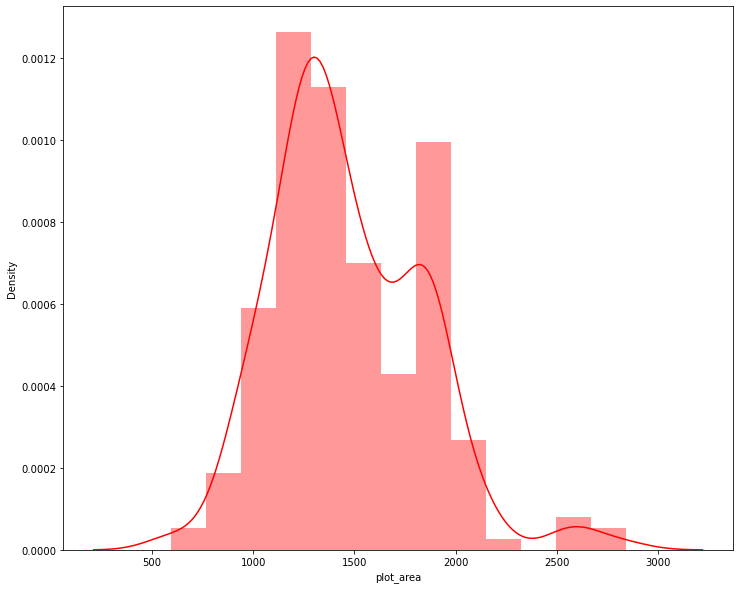

In [92]:
fig = plt.subplots(figsize=(12,10))
sns.distplot(df_A['plot_area'], kde=True, rug=False,color="red")

In [93]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='plot_area', ylabel='Density'>

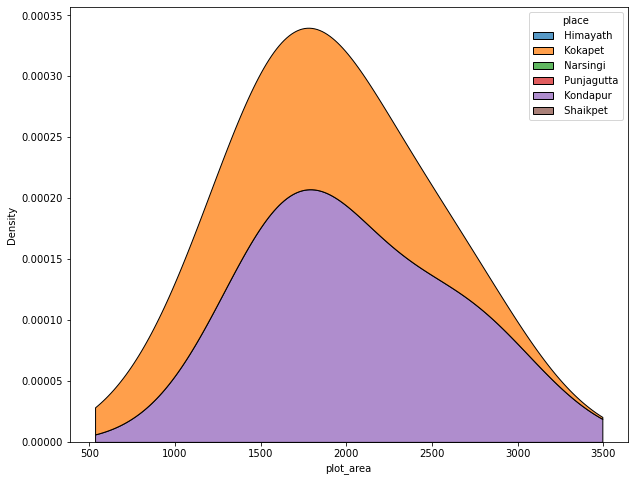

In [94]:
fig = plt.subplots(figsize=(10,8))
sns.kdeplot(data=df_A1, x="plot_area", hue="place", multiple="stack")

In [96]:
# df_A1.plot_area.iplot(
#     kind='hist',
#     bins=100,
#     xTitle='plot_area in all the rows',
#     color = 'green',
#     linecolor='black',
#     yTitle='count',
#     title='plot_area  ')

In [97]:
df_A2=df_A1[(df_A1["plot_area"]>=2500)&(df_A1["plot_area"]<=4000)]
df_A2

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
255,22500000.0,4,Agent : Hyderabad Marketing Team,8765.0,2567,3BHKApartment,Narsingi,3
513,28500000.0,10,Agent : Hyderabad Marketing Team,10656.0,2680,3BHKApartment,Kondapur,3


In [98]:
df_A3=df_A2[df_A2["cost_per_sqft"]>=10000]
df_A3

,prices,booking_start,organizing,cost_per_sqft,plot_area,type_of_house,place,type_BHK
513,28500000.0,10,Agent : Hyderabad Marketing Team,10656.0,2680,3BHKApartment,Kondapur,3
